In [ ]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━

In [ ]:
from numpy import pi,sqrt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

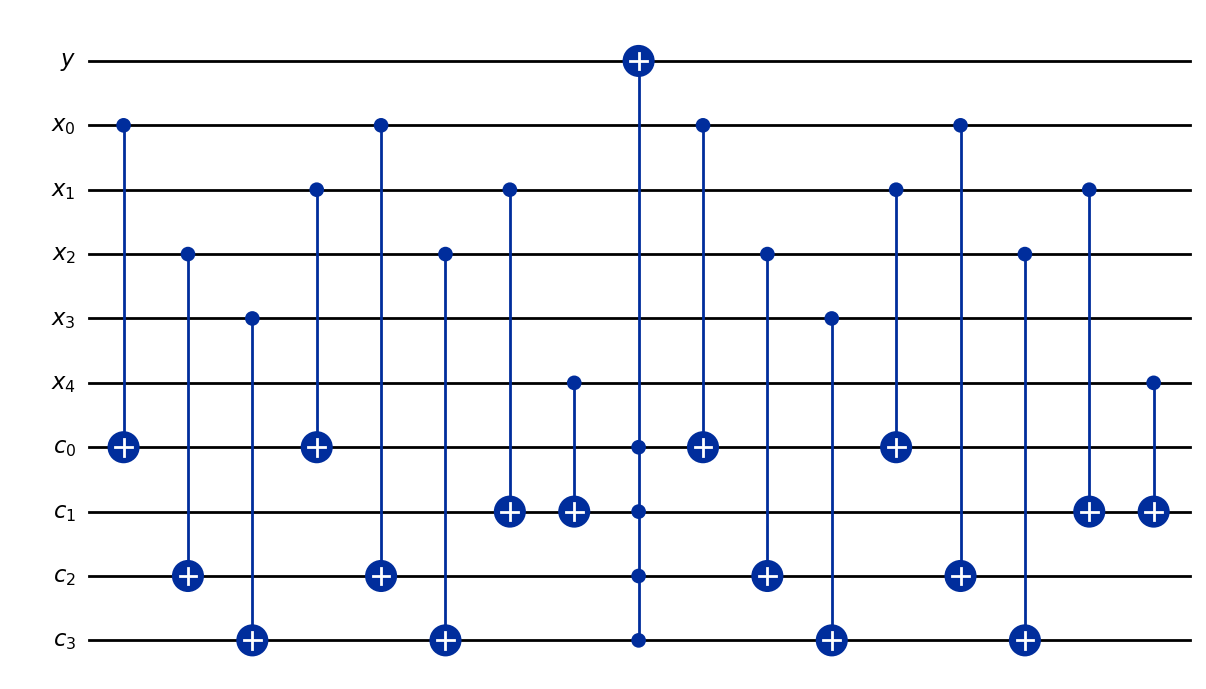

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
def grover_oracle(conditions, n):
    k = len(conditions)
    ry = QuantumRegister(1, 'y')
    rx = QuantumRegister(n, 'x')
    rc = QuantumRegister(k, 'c')
    qc = QuantumCircuit(ry, rx, rc)
    # implement |x,y> ->|x, y XOR f(X)>

    # 각 엣지의 노드끼리 XOR한 값을 Cn에 저장.
    for i in range(k):
      node1 = conditions[i][0]
      node2 = conditions[i][1]
      qc.cx(rx[node1], rc[i])
      qc.cx(rx[node2], rc[i])

    qc.mcx(rc, ry)

    # 다시 uncomputation
    for i in range(k):
      node1 = conditions[i][0]
      node2 = conditions[i][1]
      qc.cx(rx[node1], rc[i])
      qc.cx(rx[node2], rc[i])

    qc.name = 'Oracle'
    return qc                # qc 객체를 반환

n = 5
p1 = [ [0,1],[1,4],[2,0],[3,2]]
circuit = grover_oracle(p1, n) # 함수를 호출하여 회로를 표현하는 객체를 생성
circuit.draw(output='mpl',fold=-1)

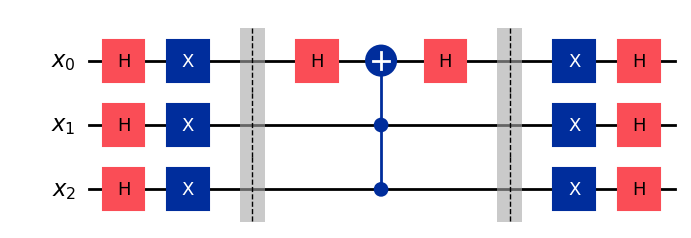

In [ ]:
# diffusion circuit for n qubits
def diffuser_circuit(n):
    x = QuantumRegister(n,'x')
    qc = QuantumCircuit(x) # n 큐비트 회로 객체 생성
    qc.h(x)                # 모든 큐비트에 H
    qc.x(x)                # 모든 큐비트에 X

    qc.barrier()
    qc.h(x[0])             # x0 (target 큐비트) 에만 H
    qc.mcx(x[1:n], x[0])   # 제어 큐비트 x[1,2,...,n-1], 타겟 큐비트 x[0] 인 다중제어 X gate
    qc.h(x[0])             # x0 (target 큐비트) 에만 H
    qc.barrier()           # HXH=Z 이기 때문에 이 결과는 다중제어-Z gate 와 같다.

    qc.x(x)                # 모든 큐비트에 X
    qc.h(x)                # 모든 큐비트에 H

    qc.name = "Diffuser"
    return qc

circuit = diffuser_circuit(3) # 함수를 호출하여 회로를 표현하는 객체를 생성
circuit.draw(output='mpl') # circuit 회로를 matplot library 형식의 그림 화일로 출력


rep=3


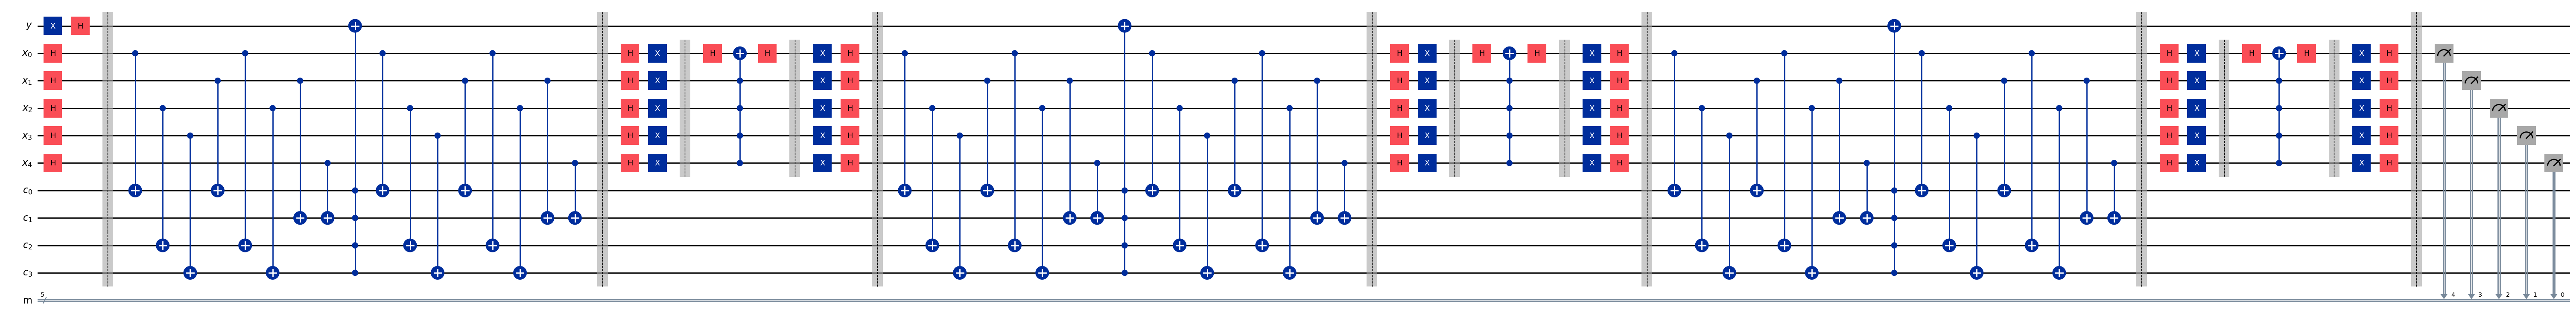

In [ ]:
# 그로버 오라클 함수와 디퓨저 함수를 1번 호출하여 그로버 회로를 circuit 이라는 이름의 객체로 구현
M = 2 # f(x)가 1이 되는 솔루션의 개수
rep = int(pi*sqrt((2**n)/M)/4)
print(f"rep={rep}")
k = len(p1)
rc = QuantumRegister(k,'c')
rx = QuantumRegister(n,'x')  # n 큐비트의 양자 레지스터 객체를 qx 라는 이름으로 생성, 회로에는 'x'로 표시
ry = QuantumRegister(1,'y')  # 1 큐비트의 양자 레지스터 객체를 qy 라는 이름으로 생성, 회로에는 'y'로 표시
rm = ClassicalRegister(n,'m') # n 비트의 고전 레지스터 객체를 c 라는 이름으로 생성, 회로에는 'c'로 표시
circuit = QuantumCircuit(ry, rx, rc, rm) # qy,qx,c 를 가지는 양자 회로를 circuit 이라는 이름의 객체로 생성
circuit.x(ry)                 # qy 큐비트에 X gate -> qy 큐비트 상태가 |1> 이 됨
circuit.h(ry)                 # qy 큐비트에 H gate -> qy 큐비트 상태가 |-> 이 됨
circuit.h(rx)                 # qx 의 모든 큐비트에 H gate 적용
circuit.barrier()
for _ in range (rep):
# grover_oracle_circuit() 을 호출하여 오라클 회로를 circuit 에 추가
    circuit.compose(grover_oracle(p1,n), range(n+k+1), inplace=True)
    circuit.barrier()
# diffuser_circuit() 을 호출하여 디퓨저 회로를 circuit 에 추가
    circuit.compose(diffuser_circuit(n), rx, inplace=True)
    circuit.barrier()

circuit.measure(rx,reversed(rm))              # qx 레지스터의 모든 큐비트들을 측정하여 c 레지스터로 읽는 회로를 구현
circuit.draw(fold=-1,output='mpl') # circuit 회로를 matplot library 형식의 그림 화일로 출력

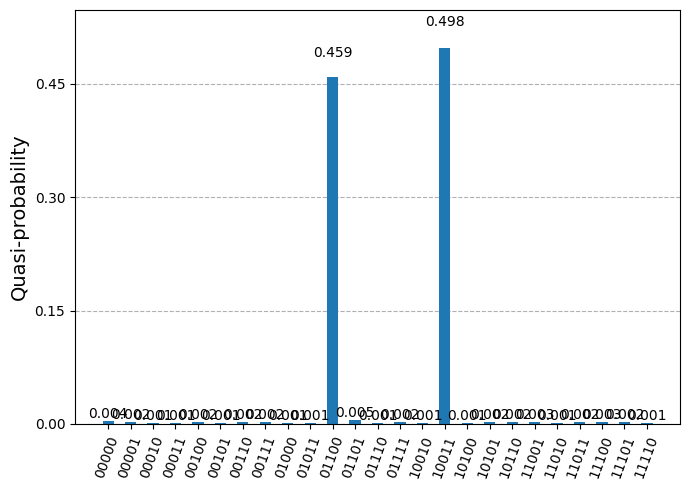

In [ ]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)

isa_circuit = pm.run(circuit)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1000)
result = job.result()
count = result[0].data.m.get_counts()

from qiskit.visualization import plot_distribution
plot_distribution(count)

In [ ]:
measured = sorted(count.items(), key=lambda x:x[1], reverse=True)
print(measured)

[('10011', 498), ('01100', 459), ('01101', 5), ('00000', 4), ('11100', 3), ('11001', 3), ('11011', 2), ('00001', 2), ('11101', 2), ('01111', 2), ('10110', 2), ('00111', 2), ('00100', 2), ('00110', 2), ('10101', 2), ('00011', 1), ('01011', 1), ('11010', 1), ('01000', 1), ('10100', 1), ('00101', 1), ('01110', 1), ('10010', 1), ('00010', 1), ('11110', 1)]


In [ ]:
measured = sorted(count.items(), key=lambda x:x[1], reverse=True)

def verify(conditions, x):
    k = len(conditions)
    v = []
    for cond in conditions:
        c = conditions.index(cond)
        flag = False
        str = ''
        for pos in cond:
            str += x[pos]
            if x[pos] == '1':  flag = not flag
        v += [[cond, flag, str]]
    return v

for m in measured[:20]:
    a = verify(p1, m[0])
    flag = True
    for cond in a:
        flag = flag and cond[1]
    print(flag, m, a)

True ('10011', 498) [[[0, 1], True, '10'], [[1, 4], True, '01'], [[2, 0], True, '01'], [[3, 2], True, '10']]
True ('01100', 459) [[[0, 1], True, '01'], [[1, 4], True, '10'], [[2, 0], True, '10'], [[3, 2], True, '01']]
False ('01101', 5) [[[0, 1], True, '01'], [[1, 4], False, '11'], [[2, 0], True, '10'], [[3, 2], True, '01']]
False ('00000', 4) [[[0, 1], False, '00'], [[1, 4], False, '00'], [[2, 0], False, '00'], [[3, 2], False, '00']]
False ('11100', 3) [[[0, 1], False, '11'], [[1, 4], True, '10'], [[2, 0], False, '11'], [[3, 2], True, '01']]
False ('11001', 3) [[[0, 1], False, '11'], [[1, 4], False, '11'], [[2, 0], True, '01'], [[3, 2], False, '00']]
False ('11011', 2) [[[0, 1], False, '11'], [[1, 4], False, '11'], [[2, 0], True, '01'], [[3, 2], True, '10']]
False ('00001', 2) [[[0, 1], False, '00'], [[1, 4], True, '01'], [[2, 0], False, '00'], [[3, 2], False, '00']]
False ('11101', 2) [[[0, 1], False, '11'], [[1, 4], False, '11'], [[2, 0], False, '11'], [[3, 2], True, '01']]
False ('